In [11]:
import os, yaml, sys
import torch
from torchvision import models, datasets
from torch.utils.data import DataLoader, Subset
ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from alignment.utils import get_usual_transform
import matplotlib.pyplot as plt

In [21]:
my_indices = [0, 1, 2, 100, 20000, 300]  # Your specific indices
imagenet_val_path = f"{paths['data_path']}/imagenet/val"
transform = get_usual_transform()
batch_size = 1
loader = DataLoader(
    Subset(datasets.ImageFolder(imagenet_val_path, transform=transform), my_indices),
    batch_size=batch_size,
    num_workers=1,
    shuffle=False,
    pin_memory=True,
    timeout=500,
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6726604..2.535425].


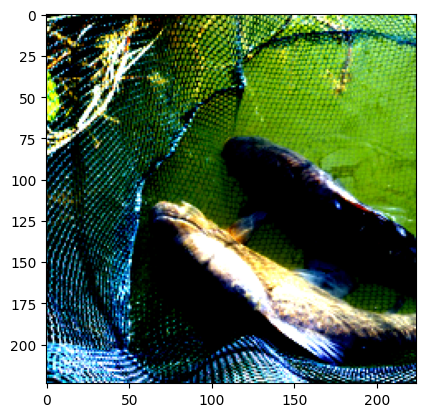

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.64].


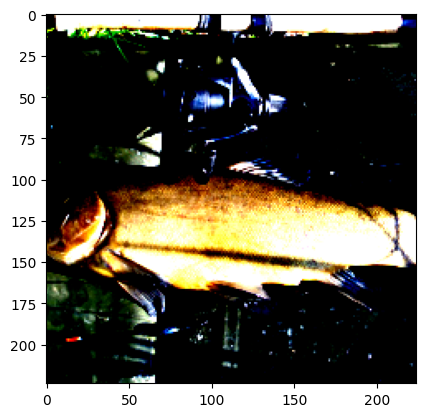

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


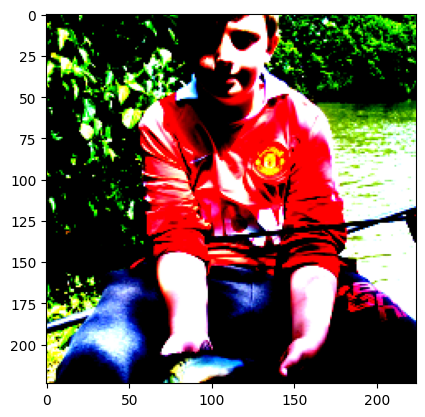

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


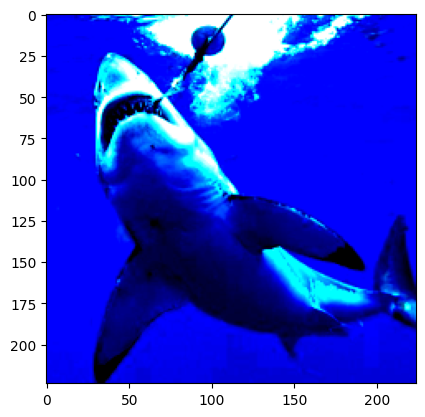

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6726604..2.64].


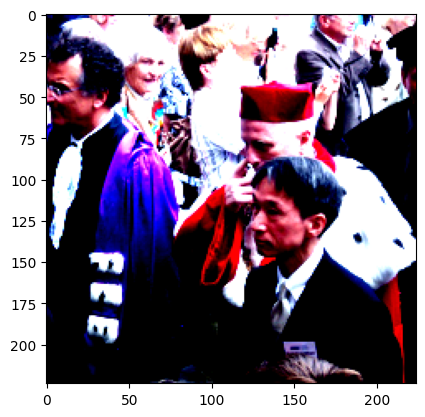

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.622571].


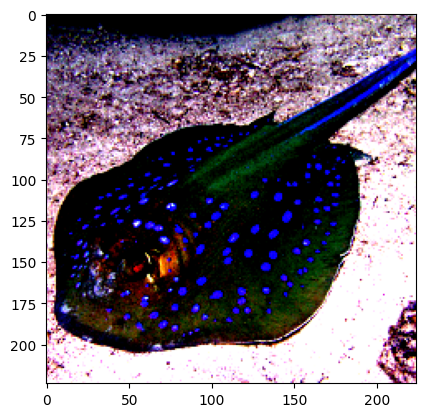

In [22]:
for img, _ in loader:
    img_np = img[0].permute(1, 2, 0).numpy()  # Change from (C, H, W) to (H, W, C)
    plt.imshow(img_np)  # Use imshow instead of show
    plt.show()
    